# Apply ARIMA to Weather Data
Assume user downloaded archive.zip from Kaggle,
renamed the file BuildingData.zip,
and stored the file in the data subdirectory.
Assume the zip file contains the weather.csv file.  

In [1]:
DATAPATH=''
try:
    # On Google Drive, set path to my drive / data directory.
    from google.colab import drive
    IN_COLAB = True
    PATH='/content/drive/'
    drive.mount(PATH)
    DATAPATH=PATH+'My Drive/data/'  # must end in "/"
except:
    # On home computer, set path to local data directory.
    IN_COLAB = False
    DATAPATH='data/'  # must end in "/"

ZIP_FILE='BuildingData.zip'
ZIP_PATH = DATAPATH+ZIP_FILE
WEATHER_FILE='weather.csv'
MODEL_FILE='Model'  # will be used later to save models

In [2]:
from os import listdir
import csv
from zipfile import ZipFile
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
from matplotlib import colors
mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1
np.set_printoptions(precision=2)

In [3]:
def read_zip_to_panda(zip_filename,csv_filename):
    zip_handle = ZipFile(zip_filename)
    csv_handle = zip_handle.open(csv_filename)
    panda = pd.read_csv(csv_handle)
    return panda
def fix_date_type(panda):
    temp_col = pd.to_datetime(panda['timestamp'])
    temp_tab = panda.drop(['timestamp'],axis=1)
    panda = temp_tab
    panda.insert(0,'date',temp_col,True)
    return panda

In [4]:
wet_df = read_zip_to_panda(ZIP_PATH,WEATHER_FILE)
wet_df = fix_date_type(wet_df)
wet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            331166 non-null  datetime64[ns]
 1   site_id         331166 non-null  object        
 2   airTemperature  331038 non-null  float64       
 3   cloudCoverage   160179 non-null  float64       
 4   dewTemperature  330838 non-null  float64       
 5   precipDepth1HR  197980 non-null  float64       
 6   precipDepth6HR  18162 non-null   float64       
 7   seaLvlPressure  309542 non-null  float64       
 8   windDirection   318161 non-null  float64       
 9   windSpeed       330592 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 25.3+ MB


## Weather data
We have 2 years of hourly weather data per site ID.  
A site is a geographical area such as a college campus.  
Each site is code-named with an animal like Bear.
For each site, we have multiple buildings.  
Each building is code-named with person-name like Lulu.  

## Plot temperature
Note two-year cycle.

In [5]:
sites=wet_df.site_id.unique()

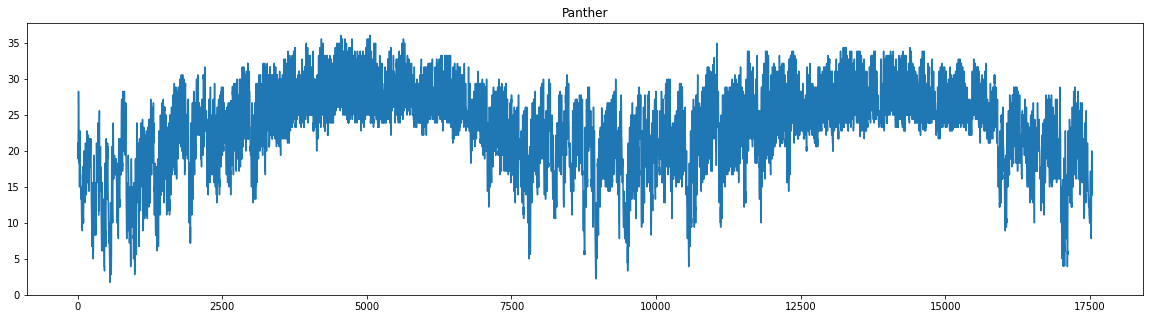

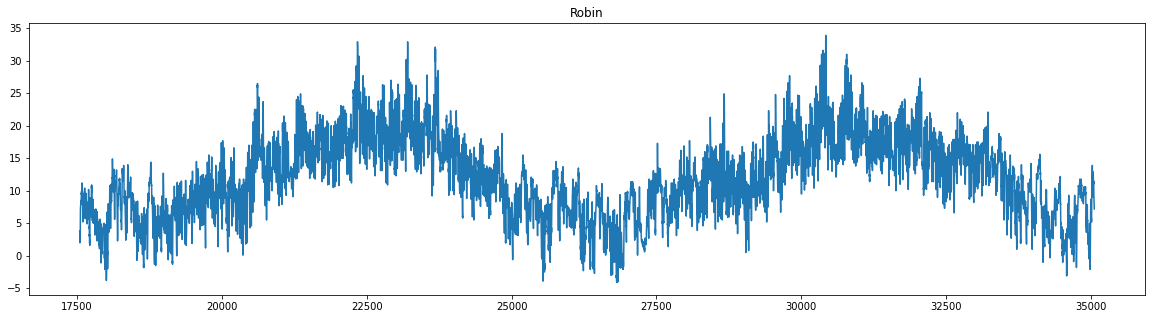

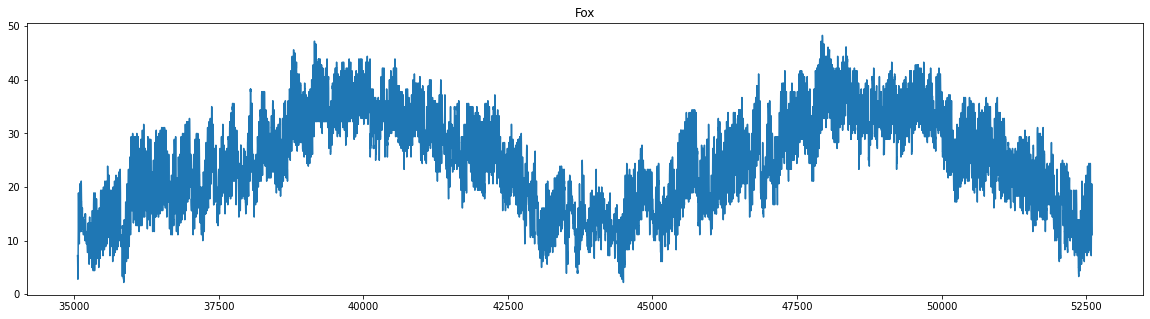

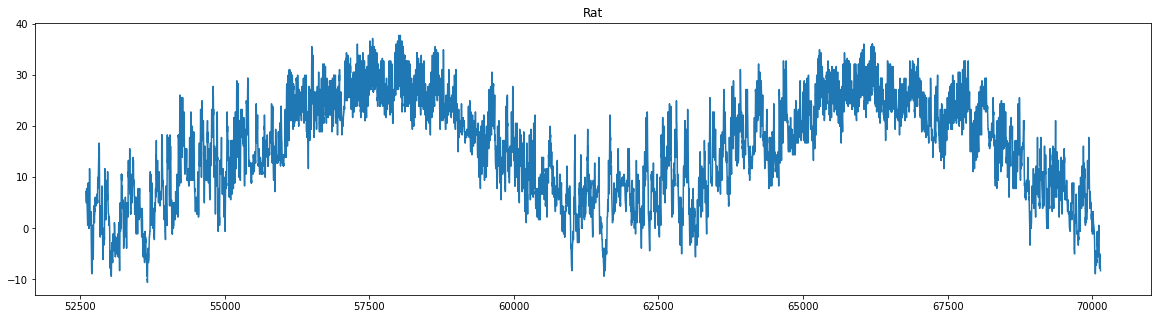

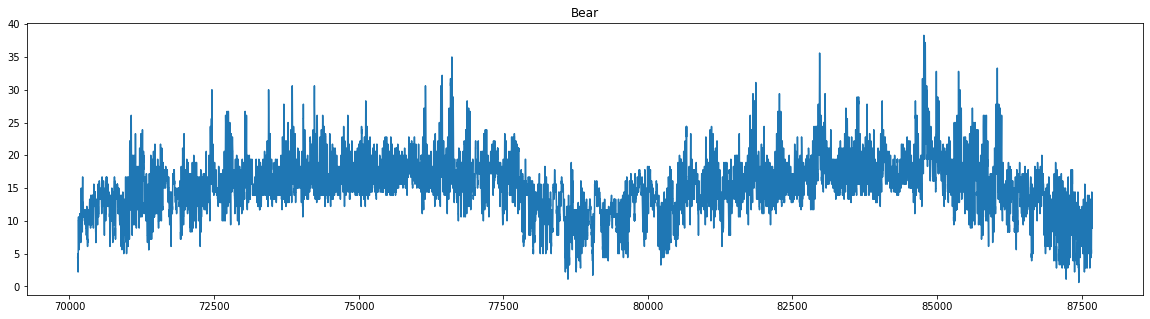

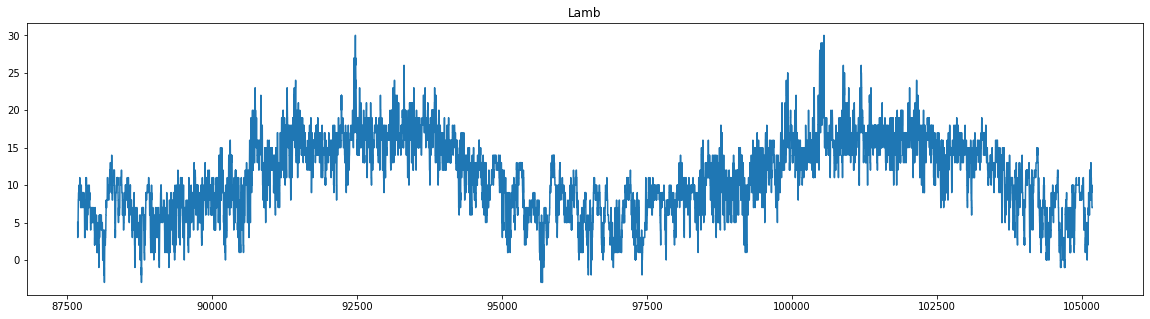

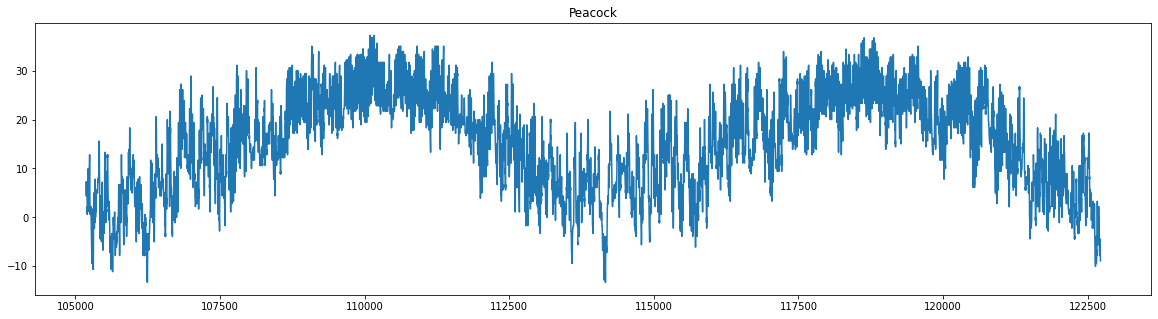

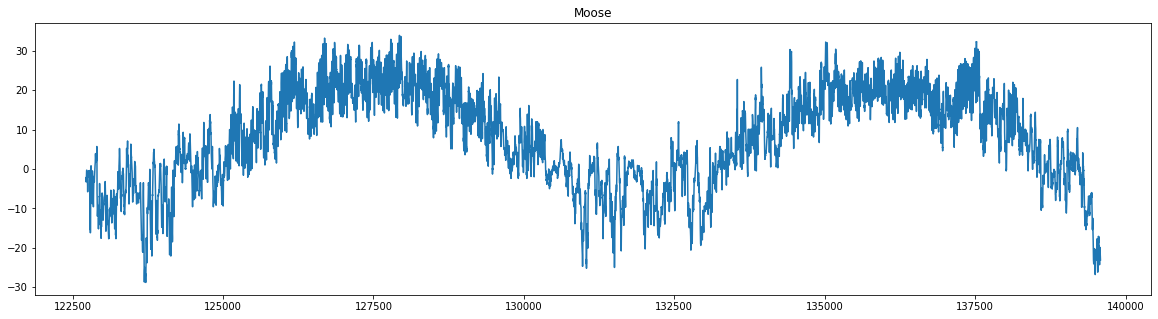

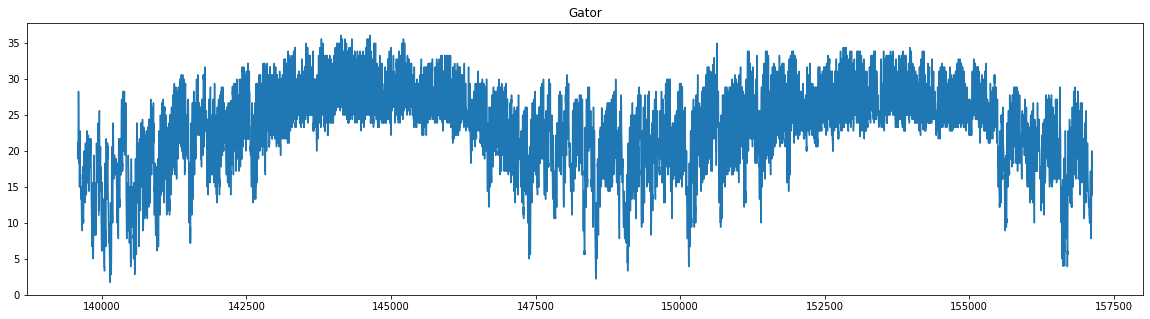

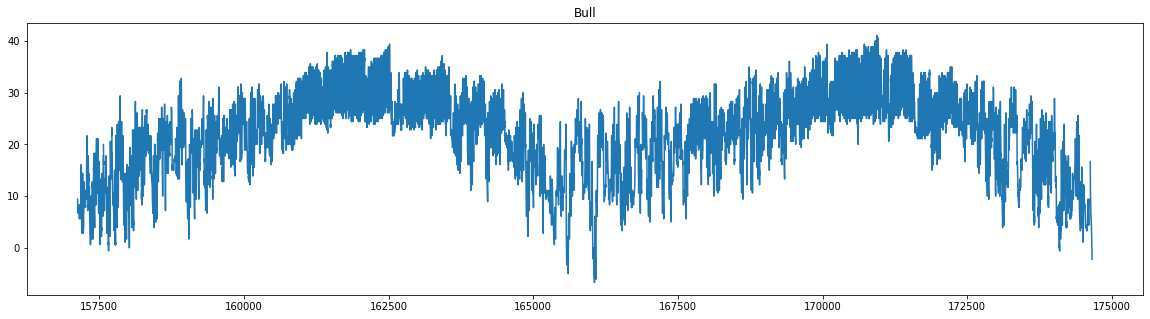

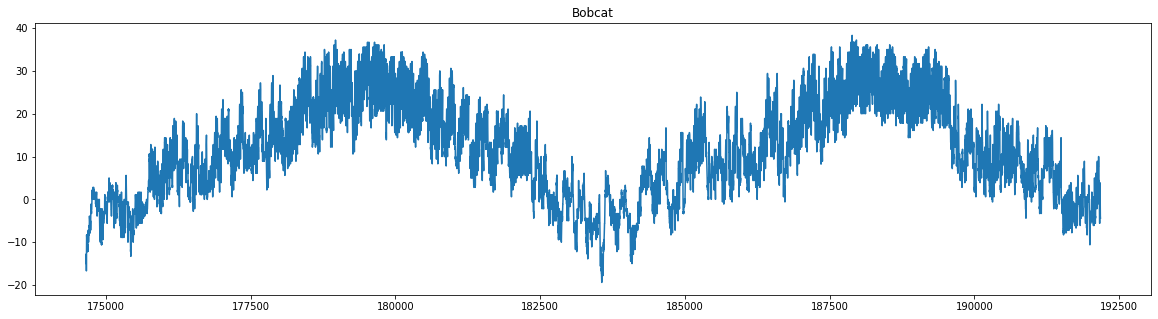

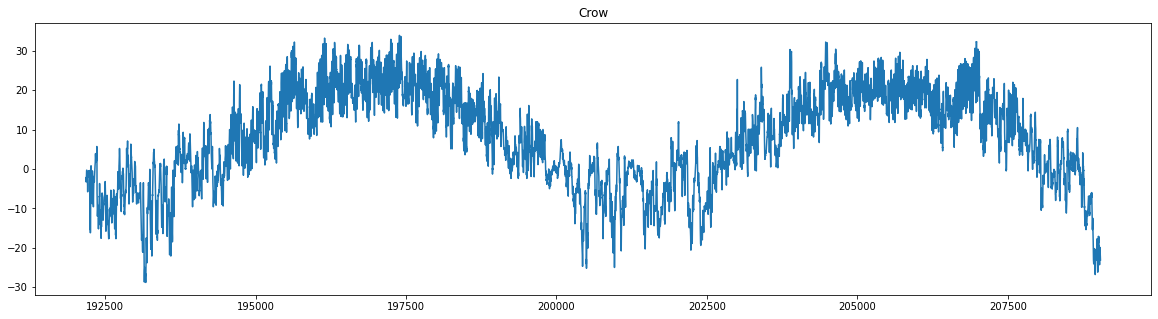

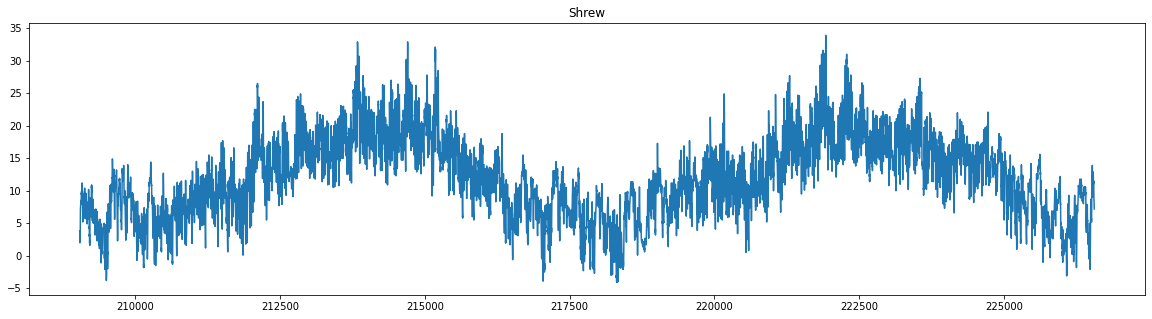

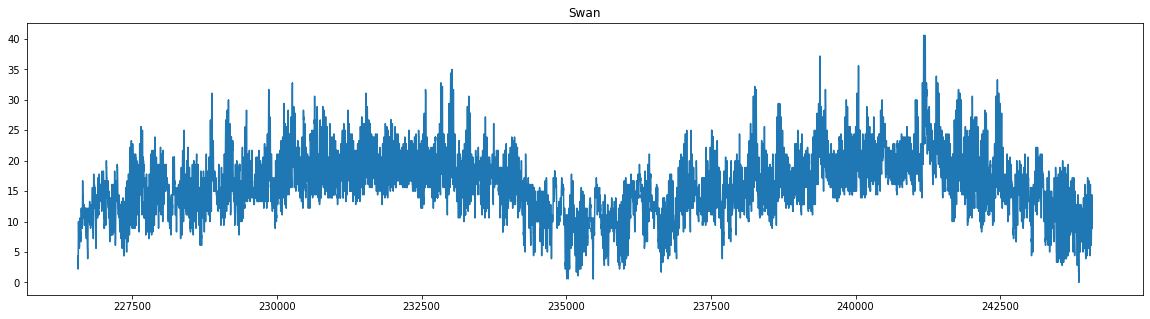

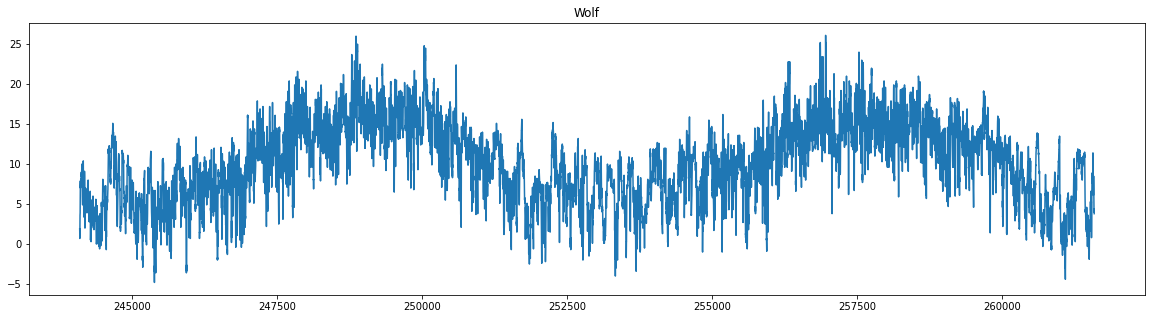

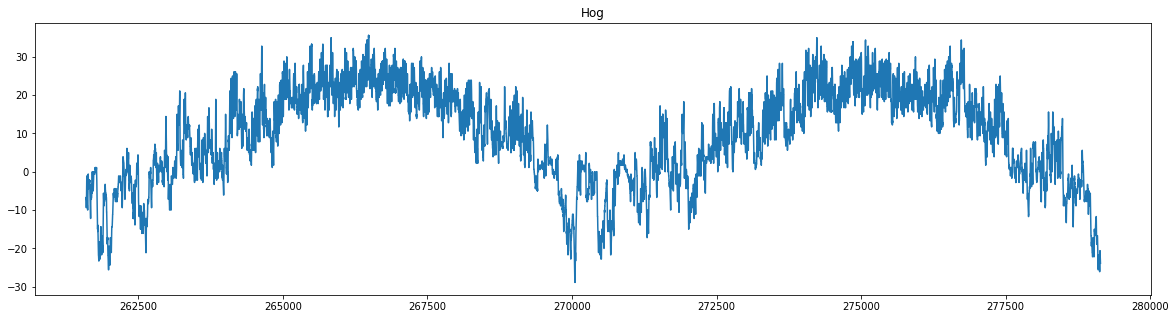

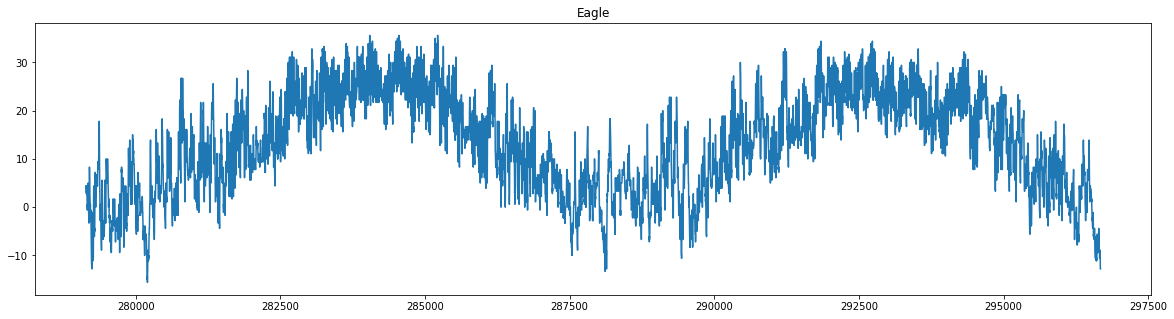

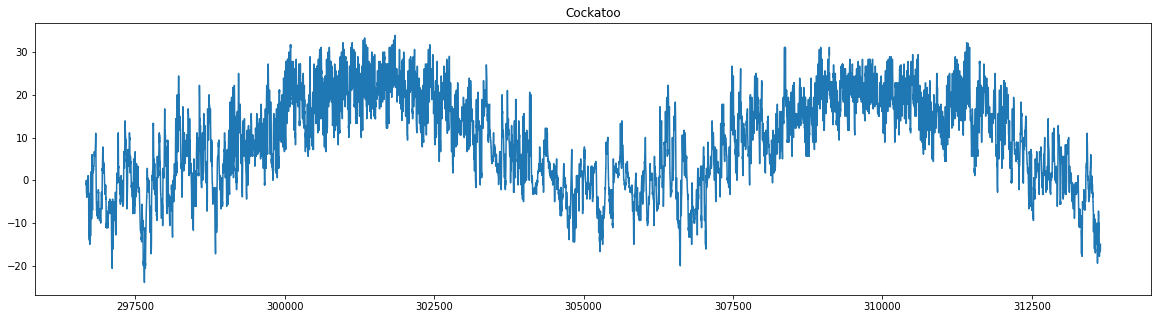

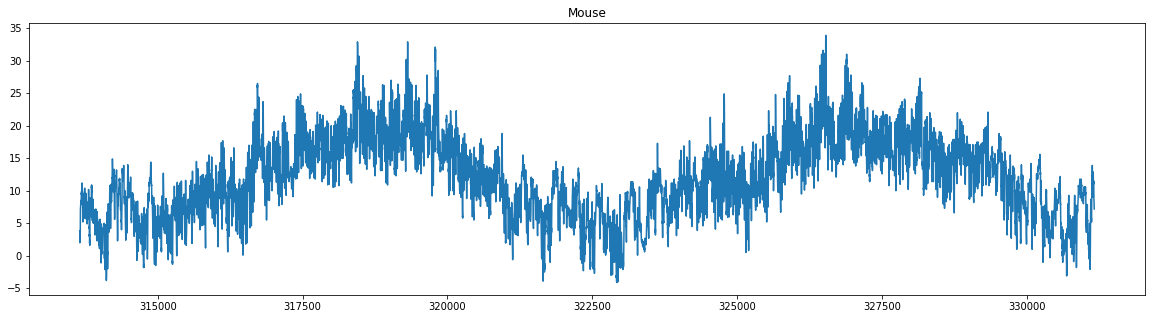

In [6]:
# Plot temperature time series per site. 
# Separate plots stacked vertically.
# X-axis shows the row number in the overall table.
for site in sites:
    site_df = wet_df[wet_df['site_id']==site]
    temp_df = site_df['airTemperature']
    temp_df.plot(figsize=(20,5))
    plt.title(site)
    plt.show()

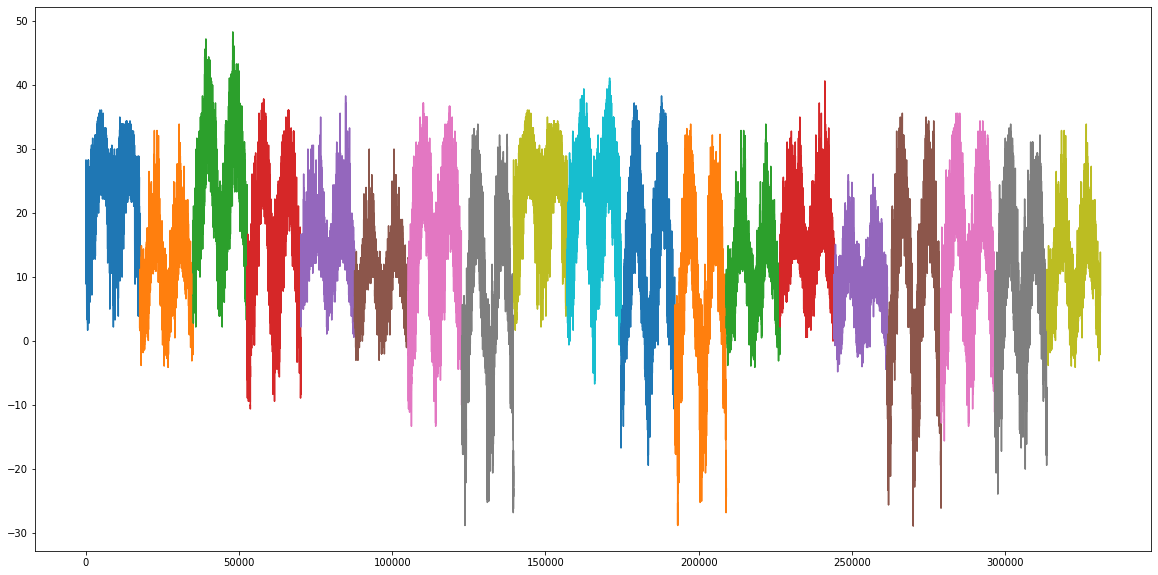

In [7]:
# Plot temperature time series per site. 
# Plot the entire table horizotally.
# X-axis shows the row number in the overall table.
sites=wet_df.site_id.unique()
for site in sites:
    site_df = wet_df[wet_df['site_id']==site]
    temp_df = site_df['airTemperature']
    temp_df.plot(figsize=(20,10))
plt.show()

## Autocorrelation

In [8]:
site='Gator'
variable='airTemperature'
series = wet_df[wet_df['site_id']==site][variable]
print(type(series))
series.head()

<class 'pandas.core.series.Series'>


139583    19.4
139584    21.1
139585    21.1
139586    20.6
139587    21.1
Name: airTemperature, dtype: float64

Analysis of airTemperature at the Gator site.
Autocorrelation measured over first 288 days.
X-axis=hours. Note 24-hour lag starts stong then dissipates.


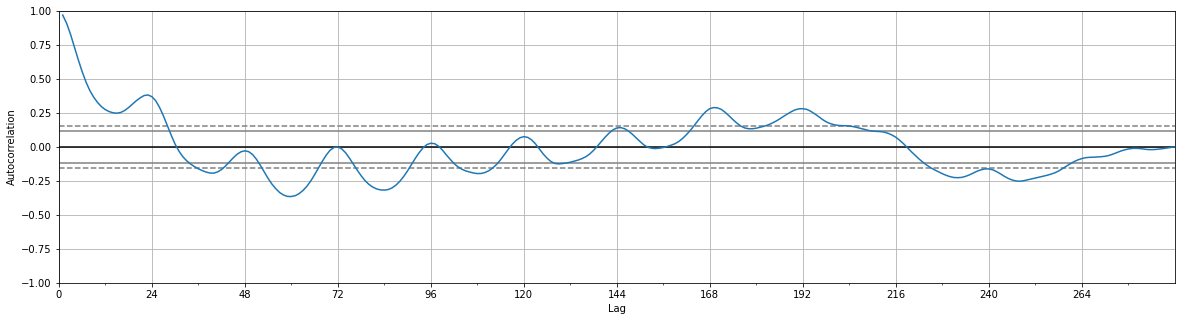

In [9]:
days=12*24
print("Analysis of",variable,"at the",site,"site.")
print("Autocorrelation measured over first",days,"days.")
print("X-axis=hours. Note 24-hour lag starts stong then dissipates.")
plt.figure(figsize=(20,5));
major_ticks = np.arange(0, days, 24)  # grid marks on the 12-hour, 24-hour boundary
minor_ticks = np.arange(0, days, 12)  # grid marks on the 12-hour, 24-hour boundary
# fig, ax = plt.subplots()
ac_axis = autocorrelation_plot(series[:days])
ac_axis.set_xticks(major_ticks,minor=False)
ac_axis.set_xticks(minor_ticks,minor=True)
plt.show()

## Useful references

Jason Brownlee  
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/